In [1]:
epochs = 15
batch_size = 100

train_dir_path = 'train/simpsons_dataset'
test_dir_path = 'testset/testset'

state_path = 'output/state.pth'
history_path = 'output/history.pkl'

In [2]:
import os

os.environ["MASTER_ADDR"] = "127.0.0.1"
os.environ["MASTER_PORT"] = "8888"

In [3]:
from pathlib import Path
import torch.multiprocessing as mp
from src.train import train
from sklearn.preprocessing import LabelEncoder
import torch

TRAIN_DIR = Path(train_dir_path)
TEST_DIR = Path(test_dir_path)

train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

label_encoder = LabelEncoder()
label_encoder.fit([path.parent.name for path in train_val_files])
gpu_count = torch.cuda.device_count()

In [4]:
%%time
mp.spawn(train, nprocs=gpu_count, args=(train_val_files, gpu_count, batch_size, epochs, label_encoder, state_path, history_path))

epoch:  10%|█         | 1/10 [00:57<08:33, 57.08s/it]


Epoch 001 train_loss: 2.1067     val_loss 1.4612 train_acc 0.4164 val_acc 0.6141 train_fq 0.6667 val_f1 0.6316


epoch:  20%|██        | 2/10 [01:57<07:52, 59.07s/it]


Epoch 002 train_loss: 1.0112     val_loss 0.9309 train_acc 0.7232 val_acc 0.7344 train_fq 0.8333 val_f1 0.7018


epoch:  30%|███       | 3/10 [02:55<06:48, 58.38s/it]


Epoch 003 train_loss: 0.5204     val_loss 0.6434 train_acc 0.8600 val_acc 0.8227 train_fq 0.9286 val_f1 0.8070


epoch:  40%|████      | 4/10 [03:52<05:48, 58.05s/it]


Epoch 004 train_loss: 0.2960     val_loss 0.4684 train_acc 0.9203 val_acc 0.8842 train_fq 0.9286 val_f1 0.8772


epoch:  50%|█████     | 5/10 [04:49<04:48, 57.67s/it]


Epoch 005 train_loss: 0.1631     val_loss 0.3595 train_acc 0.9561 val_acc 0.9091 train_fq 0.9286 val_f1 0.9298


epoch:  60%|██████    | 6/10 [05:47<03:51, 57.79s/it]


Epoch 006 train_loss: 0.1192     val_loss 0.3645 train_acc 0.9682 val_acc 0.9198 train_fq 0.9762 val_f1 0.9649


epoch:  70%|███████   | 7/10 [06:46<02:54, 58.09s/it]


Epoch 007 train_loss: 0.0962     val_loss 0.2975 train_acc 0.9744 val_acc 0.9324 train_fq 0.8810 val_f1 0.9649


epoch:  80%|████████  | 8/10 [07:45<01:56, 58.40s/it]


Epoch 008 train_loss: 0.0712     val_loss 0.3527 train_acc 0.9792 val_acc 0.9270 train_fq 1.0000 val_f1 0.8947


epoch:  90%|█████████ | 9/10 [08:43<00:58, 58.25s/it]


Epoch 009 train_loss: 0.0622     val_loss 0.3384 train_acc 0.9822 val_acc 0.9308 train_fq 1.0000 val_f1 0.9649


epoch: 100%|██████████| 10/10 [09:42<00:00, 58.21s/it]



Epoch 010 train_loss: 0.0545     val_loss 0.3205 train_acc 0.9832 val_acc 0.9415 train_fq 0.9762 val_f1 0.9825


epoch:   0%|          | 0/10 [09:42<?, ?it/s]


CPU times: user 157 ms, sys: 18.3 ms, total: 176 ms
Wall time: 9min 49s


In [5]:
import pickle

with open(history_path, 'rb') as f:
    history = pickle.load(f)

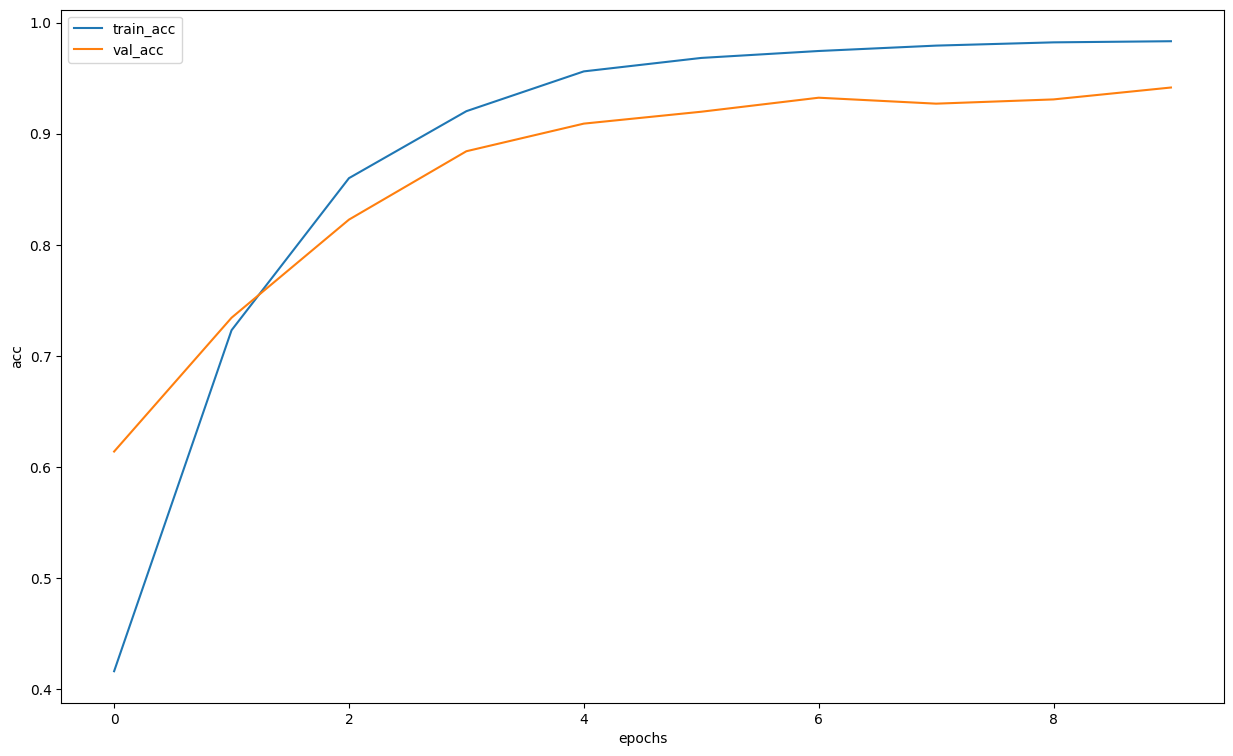

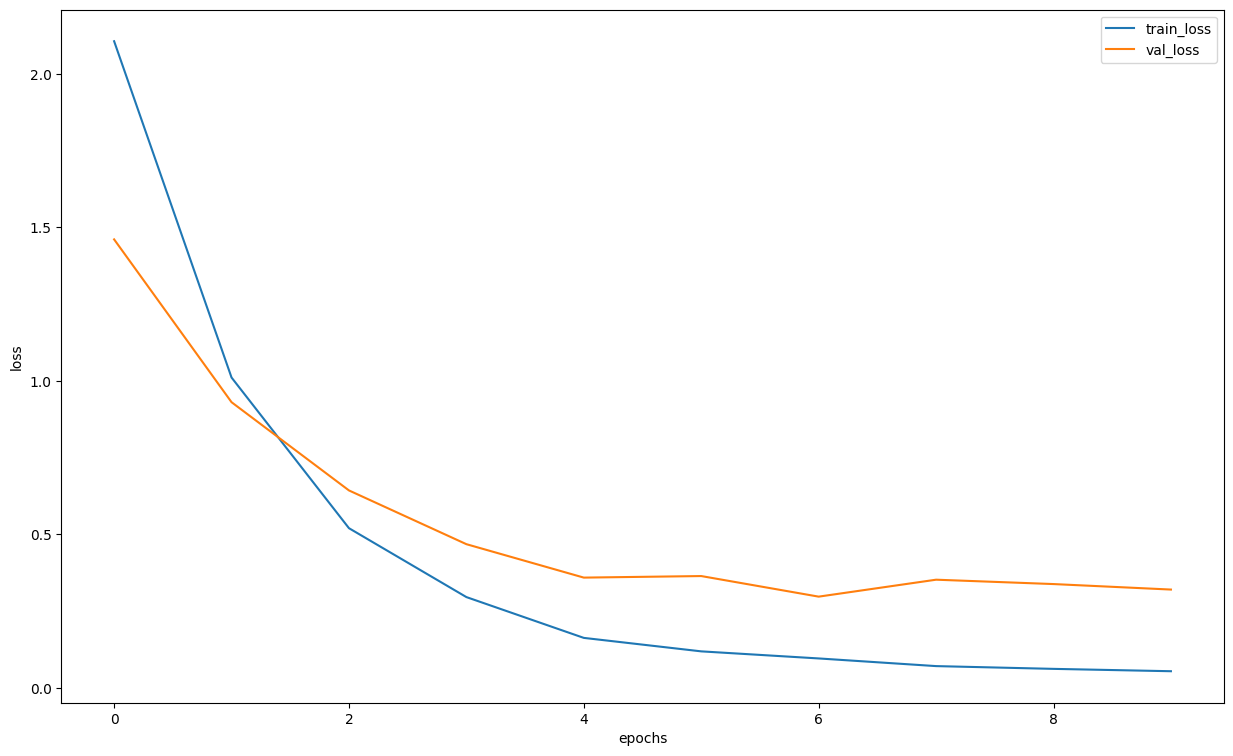

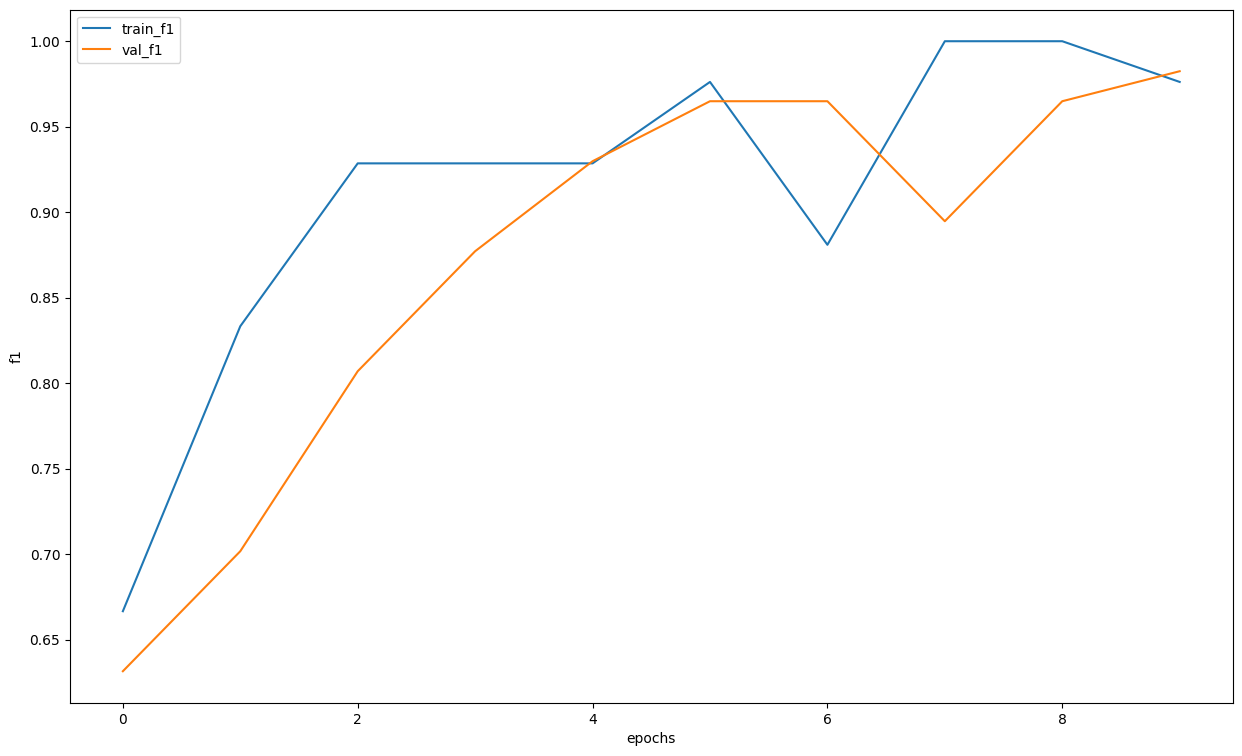

In [6]:
from matplotlib import pyplot as plt

for history_key in history:
    plt.figure(figsize=(15, 9))
    plt.plot(history[history_key]["train"], label=f"train_{history_key}")
    plt.plot(history[history_key]["val"], label=f"val_{history_key}")
    plt.legend(loc='best')
    plt.xlabel("epochs")
    plt.ylabel(history_key)
    plt.show()